####### calculearner. Code to run at jupyterlite.github.io/demo/lab/index.htm

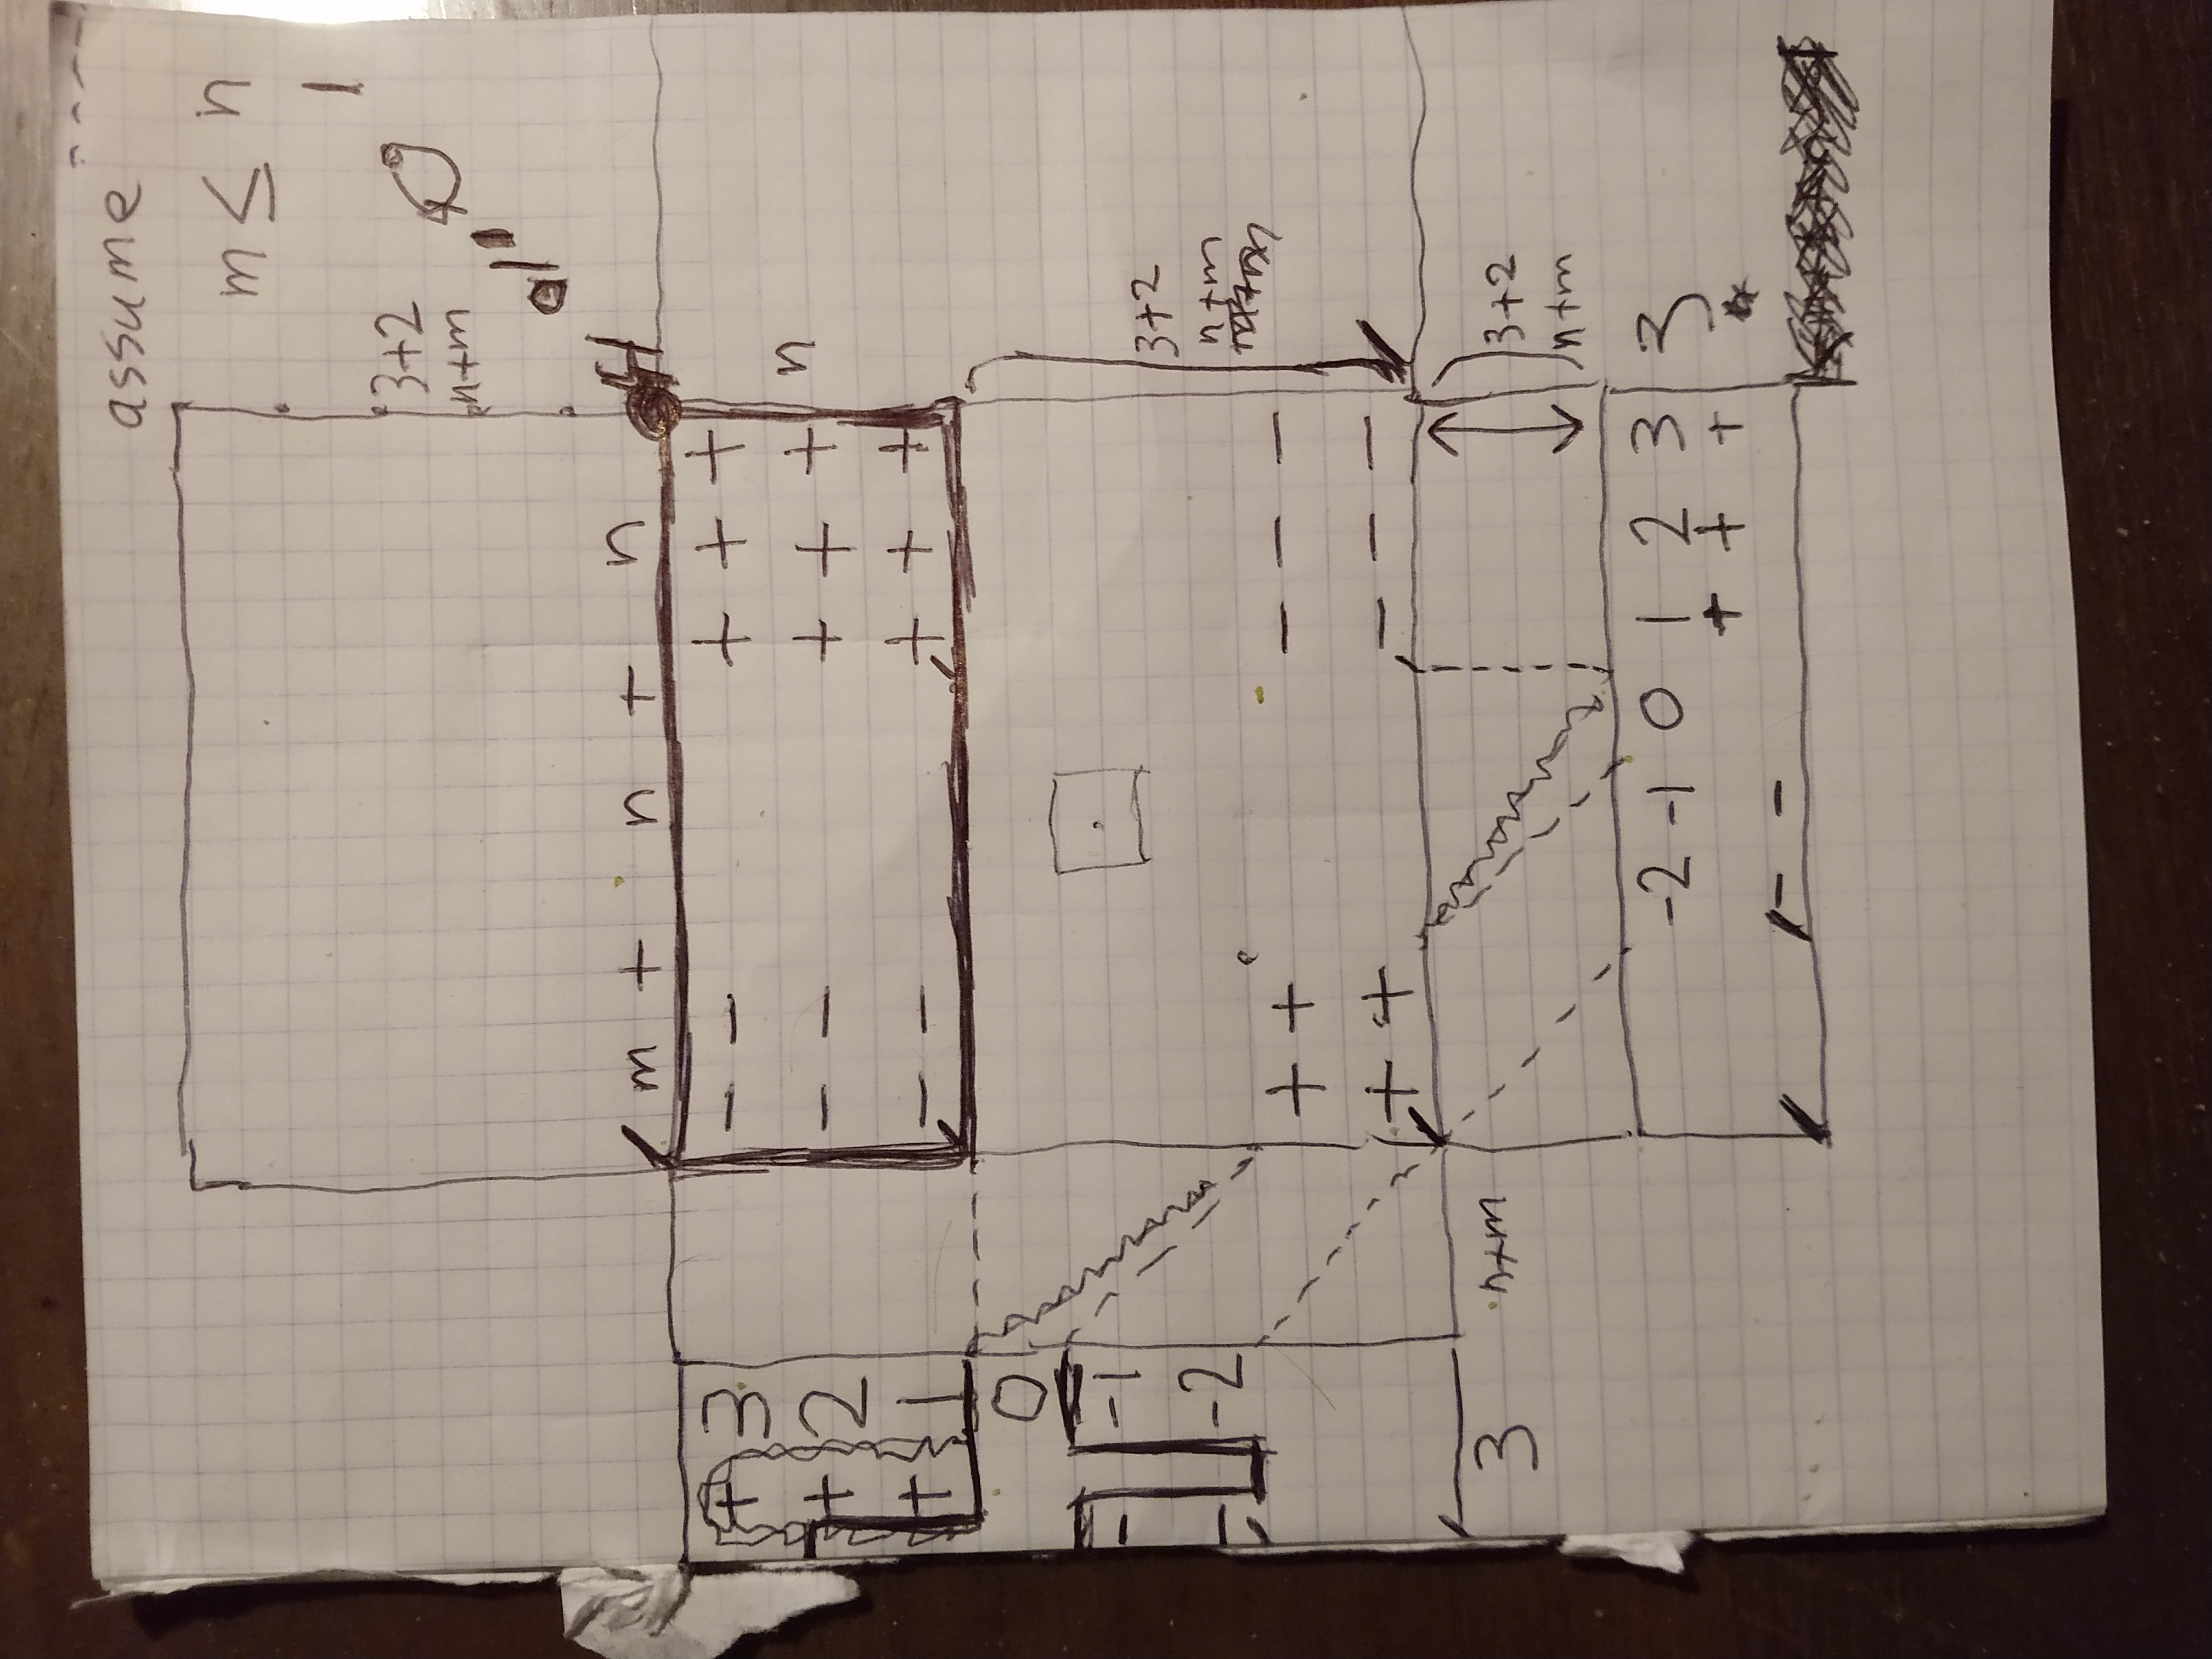

In [74]:
######## DESIGN, TODO: repo has bugfix for images in MarkDown
from IPython.display import Image
#Image(filename='multiply_design.jpg',width=200)
#![An area subdivided](multiply_design.jpg "a non-final design of this multiplication thing")
Image(filename='NPmultiply_design.jpg',width=200)


In [60]:
############## utilities: showSVG/saveSVG/dblOutputSVG and indent
from IPython.display import HTML, display
def showSVG(svg):
    display(HTML(f'<html><body>{svg}</body></html>'))    
def saveSVG(fileName,svg):
    f=open(f'{fileName}.svg','w') #calc{n}x{n}
    svgDocType =(
        '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n'
        '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'
    )
    f.write(svgDocType+svg)
    f.close()
def dblOutputSVG(fileName,svg):
    saveSVG(fileName,svg)
    showSVG(svg)

def ind(s,n=1):
    return "  "*n+s[:-1].replace("\n",("\n"+"  "*n))+"\n"

In [61]:
########## parameters, etc.
frontBack=input("Which side (front/back)?")
frontBack="front" if (frontBack=="" or frontBack[0]!="b") else "back"

faveMoji = input("Your favorite emoji (e.g. 💩🤙💋) to count?")
faveMoji="💩" if faveMoji=="" else faveMoji

mx0y0n=input("min[TODO],x,y,max? (e.g. -2,4,8,12)") # m2,p4,p8,p12
mx0y0n="0,2,3,5" if mx0y0n=="" else mx0y0n
m_x0_y0_n=mx0y0n.split(sep=",")
m,x0,y0,n=int(m_x0_y0_n[0]),int(m_x0_y0_n[1]),int(m_x0_y0_n[2]),int(m_x0_y0_n[3])

layering=input("all/base/slider/lid[TODO],layout/stack,contiguous/shatter") #b/s/l/a,s/l,s/c
layering="all,layout,contiguous" if layering=="" else layering
if len(layering)==3 :
    layering=layering[0]+","+layering[1]+","+layering[2]
la_ye_ring=layering.split(",")
select,stack,shatter=la_ye_ring[0],la_ye_ring[1],la_ye_ring[2]#TODO: use select
select={"b":"base","s":"slider","l":"lid","a":"all"}[select[0]]
stack="stack" if stack[0]=="s" else "layout"
shatter="shatter" if shatter[0]=="s" else "contiguous"

render=input("browser/rhino/pdf, color/red&black/black, script/links/none")
render="browser,color,script" if render=="" else render
if len(render)==3:
    render=render[0]+","+render[1]+","+render[2]
ren_der=render.split(sep=",")
target,colors,interact=ren_der[0],ren_der[1],ren_der[2]
target={"b":"browser","r":"rhino","p":"pdf"}[target[0]]
colors={"c":"color","r":"red&black","b":"black"}[colors[0]]
interact={"s":"script","l":"links","n":"none"}[interact[0]]

if (frontBack=="back"):
    filename="multiply_back"
else:
    def Mnum(i):
        return "m"+str(i) if i<0 else "p"+str(i)
    filename ="mply"
    filename+="_"+Mnum(m)+Mnum(x0)+Mnum(y0)+Mnum(n)
    filename+="_"+select[0]+stack[0]+shatter[0]
    filename+="_"+target[0]+colors[0]+interact[0]
    filename+="_"+str(ord(faveMoji))
print(filename)

Which side (front/back)? 
Your favorite emoji (e.g. 💩🤙💋) to count? 
min[TODO],x,y,max? (e.g. -2,4,8,12) 0,2,2,2
all/base/slider/lid[TODO],layout/stack,contiguous/shatter als
browser/rhino/pdf, color/red&black/black, script/links/none brn


mply_p0p2p2p2_als_brn_128169


In [62]:
########## sizing and positioning, TODO: make it NP compatible. Is viewBox correct?
N=n+1


square=3*n+5
border=0.4
nudge=border/2 if shatter=="shatter" else 0
push=square+2*border if stack!="stack" else 0

leftBottom=-4-n-border if interact=="none" else -4-n-n-border
topRight=2*n+1+border+push


NPsquare
NPborder=border
NPnudge=border/2 if shatter=="shatter" else 0
NPpush=NPsquare+2*border if stack!="stack" else 0

NPleftBottom=...
NPtopRight=...


vBsize=topRight-leftBottom
svgWidth,svgHeight=f'{10*vBsize}mm',f'{10*vBsize}mm'
viewBox=f'{leftBottom} -{topRight} {vBsize} {vBsize}'

In [63]:
backsideTxt=f'<g transform="translate()">\n'

backsideTxt+='  <text transform="translate(0,0)scale(1,-1)">- Add your style/art/name/etc</text>\n'
    
backsideTxt+='  <text transform="translate(0,-2)scale(1,-1)">- No two are the same,</text>\n'
backsideTxt+='  <text transform="translate(0,-3)scale(1,-1)">counting is ignoring too.</text>\n'
backsideTxt+='  <text transform="translate(0,-4)scale(1,-1)">Question value systems,</text>\n'
backsideTxt+='  <text transform="translate(0,-5)scale(1,-1)">help others do good</text>\n'

backsideTxt+='  <text transform="translate(0,-7)scale(1,-1)">- licensed: \u1F16D\u1F16\u1F10E</text>\n'
# https://www.ctrl.blog/entry/creative-commons-unicode-fallback-font.html
backsideTxt+='  <text transform="translate(0,-8)scale(1,-1)">steltenpower.com/CalcuLearning</text>\n'
backsideTxt+='  <text transform="translate(0,-10)scale(1,-1)">♡ for ❀❀</text>\n'

backsideTxt+='</g>\n' 

In [64]:
###### txtRect, TODO: use faveMoji, use -m
def write(x,y,chars):
    return f'<g transform="translate({x},{y})scale(1,-1)"><text>{chars}</text></g>\n'
def my_sign(x):
    return (x > 0) - (x < 0)
def emoji(xy): # For now: not used, therefore neither is the previous def
    return ["➖"," ",faveMoji][my_sign(xy)+1]
def transl(x,y,inner):
    return f'<g transform="translate({x},{y})">\n{ind(inner)}</g>\n'
    
def txtRect(width,height, minimum,char):
    ink=""
    if (width==height): # square
        for i in range(minimum,width): # when m=0 this works, but otherwise ...
            for j in range (minimum,height):
                if char!=0 :
                    ink+=write(i+0.05*(2-(i%5)),j+0.05*(2-(j%5)),emoji(i*j+1))
                else:    
                    ink+=write(i,j,str(i*j))
    else: # serie
        for k in range(minimum,max(width,height)):
            if char==0:
                snippet=str(k)
                ink+=ind(write(k+0.05*(2-((k-1)%5)),0,snippet) if height==1 else write(0,k+0.05*(2-((k-1)%5)),snippet))
            else:
                snippet=emoji(k+1)
                ink+=ind(write(k+0.05*(2-((k)%5)),0,snippet) if height==1 else write(0,k+0.05*(2-((k)%5)),snippet))
    return ink

def NPtxtRect(width,height, minimum,char):
    ink="" #TODO: make this work for negative m
    return ink

In [65]:
####### interactivity, TODO: Links, drag&drop,
script=(
     '<script type="text/javascript"> <![CDATA[\n' # For now only arrow keys. Click at borders to be added.
     '// below some incomplete code for smoother sliding\n'
     '//stepID=0;\n'
     '//stepPerc=[2,2,3,4,5,6,7,7,7,7,7,7,7,7,6,5,4,3,2,2]; // 20 stuks\n'
     '//perc=0;\n'
     '//itv= setInterval(frame, 50);\n'
     '//function frame(){\n'
     '//  if (perc==100) clearInterval(itv);\n'
     '//  else{\n'
     '//    perc+=stepPerc[stepID];\n'
     '//    stepID+=1;\n'
     '//  }\n'
     '//}\n'
    f'var x={x0};\n'
    f'var y={y0};\n'
     'var svg=document.getElementsByTagName("svg")[0];\n'
     'var pt=svg.createSVGPoint();\n'
     'var xSlider=document.getElementById("xSlider");\n'
     'var ySlider=document.getElementById("ySlider");\n'
     'function slideX(dx){\n'
    f'  if (((x+dx)>=0) && ((x+dx)<={n}))'+'{\n'
     '     x+=dx;\n'  
    f'     xSlider.setAttribute("transform","translate(0,"+x+")");\n'
     '  }\n'
     '}\n'
     'function slideY(dy){\n'
    f'  if (((y+dy)>=0) && ((y+dy)<={n}))'+'{\n'
     '    y+=dy;\n' 
    f'    ySlider.setAttribute("transform","translate(0,"+y+")");\n'
     '  }\n'
     '}\n'
     'function slideKey(event){\n'
     '  event.preventDefault();\n'
     '  switch (event.key){\n'
     '    case "ArrowLeft":\n'
     '      slideX(-1);\n' 
     '      break;\n'
     '    case "ArrowRight":\n'
     '      slideX(1);\n'
     '      break;\n'
     '    case "ArrowDown":\n'
     '      slideY(-1);\n' 
     '      break;\n'
     '    case "ArrowUp":\n'
     '      slideY(1);\n'
     '      break;\n'
     '  }\n'
     '}\n'
     'function slideClick(event){\n'
     '  pt.x = event.clientX;\n'
     '  pt.y = event.clientY;\n'
     '  var curPt =  pt.matrixTransform(svg.getScreenCTM().inverse());\n'
     '  xP=curPt.x;\n'
     f'  yP={square}-curPt.y;\n'
     '  M=yP-xP;\n'
     '  P=yP+xP;\n'
     '  MP=M*P;\n'
     '  event.preventDefault();\n'
     '  switch (Math.sign(MP)){\n'
     '    case -1:\n'
     '      slideX(Math.sign(P));\n' 
     '      break;\n'
     '    case 1:\n'
     '      slideY(Math.sign(P));\n' 
     '      break;\n'
     '  }\n'
     '}\n'
     ']]> </script>\n'
)
eventListeners=' onclick="slideClick(event)" onkeydown="slideKey(event)"'

comment="""
<a href="pageN.pdf#page={x,y}" onclick="return theFunction(x,y,n);">Item</a>
<script type="text/javascript">
    function theFunction () {
        move x y
        return false;
    }
</script>
"""

In [66]:
###### baseTxt, TODO: replace X with emoji AND start with -m instead of 0
c =""
c+=transl(   0,   0, txtRect( N,N,  0, 0 ))
c+=transl(  -n,  -n, txtRect( n,n,  0,"X"))
c+=transl(-n-1,-n-3, txtRect( N,1,  0, 0 ))
c+=transl(  -n,-n-4, txtRect( n,1,  0,"X"))
c+=transl(-n-3,-n-1, txtRect( 1,N,  0, 0 ))
c+=transl(-n-4,  -n, txtRect( 1,n,  0,"X"))
baseTxt =f'<g id="baseTxt" letter-spacing="-0.2px">\n{ind(c)}</g>\n'

NPc =""
NPc+=transl(   0,   0, NPtxtRect( N,N,  0, 0 ))
NPc+=transl(  -n,  -n, NPtxtRect( n,n,  0,"X"))
NPc+=transl(-n-1,-n-3, NPtxtRect( N,1,  0, 0 ))
NPc+=transl(  -n,-n-4, NPtxtRect( n,1,  0,"X"))
NPc+=transl(-n-3,-n-1, NPtxtRect( 1,N,  0, 0 ))
NPc+=transl(-n-4,  -n, NPtxtRect( 1,n,  0,"X"))
NPbaseTxt =f'<g id="NPbaseTxt" letter-spacing="-0.2px">\n{ind(NPc)}</g>\n'


In [67]:
basePath=f'<path id="basePath" d="M-{4+n},-{4+n} v1 l1,1 v1 h-1 v{3*n+2} h{3*n+5} v-{3*n+5} h-{3*n+2} v1 h-1 l-1,-1 z"/>\n'

NPbasePath=f'<path id="NPbasePath" d="M-{4+n},-{4+n} v1 l1,1 v1 h-1 v{3*n+2} h{3*n+5} v-{3*n+5} h-{3*n+2} v1 h-1 l-1,-1 z"/>\n'


In [68]:
lidTxt=f'<g transform="translate({n-3+push},{2*n+push})scale(1,-1)"><text>scale top and right of this shape to {3*n+5}cm</text></g>\n'

In [69]:
####### lidPath
lidPaths =f'<g fill-rule="evenodd" fill="blue" id="lidPath" transform="translate({push},{push})">\n'
lidPaths+=f'  <path d="M-{4+n},-{4+n} v1 l1,1 v1 h1 v{n+1} h-2 v{2*n+1} h{3*n+5} v-{3*n+5} h-{2*n+1} v2 h-{n+1} v-1 h-1 l-1,-1 z '
lidPaths+=    f'M0,0 h{n+1} v{n+1} h-{n+1} z '
lidPaths+=    f'M-{n},-{n} h{n} v{n} h-{n} z"/>\n'
lidPaths+= '</g>\n'

NPlidPaths =...
NPlidPaths+=...
NPlidPaths+=...
NPlidPaths+=...
NPlidPaths+=...


In [70]:
####### Paths,yPaths=xyLayer(...
staticY_topLeft   =f'<path d="M-{4+n+nudge},{n+nudge} v{n+1} h{4+n} v-1 h-1 v-{n} z"/>\n'
staticY_right     =f'<path d="M{nudge},-{4+n-nudge} v2 h-{n} v2 h{2*n+1} v{2*n-1} h1 v{n+1} h-1 v1 h{n} v-{3*n+5} z"/>\n'
staticY_left      =f'<path d="M-{4+n+nudge},-{1+n}       v1 h1 v-1 z"/>\n'
staticY_bottomLeft=f'<path d="M-{4+n+nudge},-{4+n+nudge} v1 h1 v-1 z"/>\n'
staticY_bottom    =f'<path d="M-{1+n-nudge},-{4+n+nudge} v1 h1 v-1 z"/>\n'
staticY           =staticY_topLeft+staticY_right+staticY_left+staticY_bottomLeft+staticY_bottom
coverY            =f'<path d="M-{4+n},0 v{n} h{4+n-1} v{n} h1 v1 h{n+1} v-1 h1 v-1 h-1 v-{n-2} h-{n+1} v-1 h{n+1} v-{n} h-{2*n+1} v-2 h-1 v-{n+2} h-2 v{3+n} h1 v1 z"/>\n'
hideY_top         =f'<path d="M0,{n+1}  v{n} h{n+1}   v-{n} z"/>\n'
hideY_left        =f'<path d="M-{4+n},0 v{n} h2       v-{n} z"/>\n'
hideY_right       =f'<path d="M-{n},0   v{n} h{2*n+1} v-{n} z"/>\n'
#hideY_bottom      =f'<path d="M-{n+4},-{n+4} v4 h1 v-4 z"/>\n'
hideY             =hideY_top+hideY_left+hideY_right#+hideY_bottom
movingY = coverY+hideY

def xyLayer(direction,start):
    transform='transform="matrix(0,1,1,0,0,0)"'  if direction=="x" else ""
    lay =f'<g id="{direction}Layer" {transform}>\n'
    lay+=f'  <g transform="translate({push},0)"><!-- PUSHing layers apart from each other -->\n'
    lay+=f'    <g transform="translate(0,-{n})">\n'
    lay+=f'      <g id="{direction}Slider" transform="translate(0,{start})" fill="grey" fill-opacity="0.7">\n'
    lay+=          f'{ind(movingY,4)}'
    lay+='       </g>\n'
    lay+='     </g>\n'
    lay+=f'    <g id="{direction}Static" fill="black">\n'
    lay+=        f'{ind(staticY,3)}'
    lay+='     </g>\n'
    lay+='   </g>\n'
    lay+=' </g>\n'
    return lay
xPaths,yPaths=xyLayer("x",x0),xyLayer("y",y0)


NPstaticY_topLeft   =f'<path d="M-{4+n+nudge},{n+nudge} v{n+1} h{4+n} v-1 h-1 v-{n} z"/>\n'
NPstaticY_right     =f'<path d="M{nudge},-{4+n-nudge} v2 h-{n} v2 h{2*n+1} v{2*n-1} h1 v{n+1} h-1 v1 h{n} v-{3*n+5} z"/>\n'
NPstaticY_left      =f'<path d="M-{4+n+nudge},-{1+n}       v1 h1 v-1 z"/>\n'
NPstaticY_bottomLeft=f'<path d="M-{4+n+nudge},-{4+n+nudge} v1 h1 v-1 z"/>\n'
NPstaticY_bottom    =f'<path d="M-{1+n-nudge},-{4+n+nudge} v1 h1 v-1 z"/>\n'
NPstaticY           =NPstaticY_topLeft+NPstaticY_right+NPstaticY_left+NPstaticY_bottomLeft+NPstaticY_bottom
NPcoverY            =f'<path d="M-{4+n},0 v{n} h{4+n-1} v{n} h1 v1 h{n+1} v-1 h1 v-1 h-1 v-{n-2} h-{n+1} v-1 h{n+1} v-{n} h-{2*n+1} v-2 h-1 v-{n+2} h-2 v{3+n} h1 v1 z"/>\n'
NPhideY_top         =f'<path d="M0,{n+1}  v{n} h{n+1}   v-{n} z"/>\n'
NPhideY_left        =f'<path d="M-{4+n},0 v{n} h2       v-{n} z"/>\n'
NPhideY_right       =f'<path d="M-{n},0   v{n} h{2*n+1} v-{n} z"/>\n'
#NPhideY_bottom      =f'<path d="M-{n+4},-{n+4} v4 h1 v-4 z"/>\n'
NPhideY             =NPhideY_top+NPhideY_left+NPhideY_right#+NPhideY_bottom
NPmovingY = NPcoverY+NPhideY

def NPxyLayer(direction,start):
    transform='transform="matrix(0,1,1,0,0,0)"'  if direction=="x" else ""
    lay =f'<g id="NP{direction}Layer" {transform}>\n'
    lay+=f'  <g transform="translate({push},0)"><!-- PUSHing layers apart from each other -->\n'
    lay+=f'    <g transform="translate(0,-{n})">\n'
    lay+=f'      <g id="NP{direction}Slider" transform="translate(0,{start})" fill="grey" fill-opacity="0.7">\n'
    lay+=          f'{ind(NPmovingY,4)}'
    lay+='       </g>\n'
    lay+='     </g>\n'
    lay+=f'    <g id="NP{direction}Static" fill="black">\n'
    lay+=        f'{ind(NPstaticY,3)}'
    lay+='     </g>\n'
    lay+='   </g>\n'
    lay+=' </g>\n'
    return lay
NPxPaths,NPyPaths=NPxyLayer("x",x0),NPxyLayer("y",y0)


In [71]:
####### build SVG from components, TODO: add "add glue here" paths
if (frontBack=="back"):
    innerUpSVG=backsideTxt
    NPinnerUpSVG=NPbacksideTxt
else:
    attrTxt =' transform="translate(0.4,0.45)" dominant-baseline="central" font-family="Courier" font-size="0.95px" text-anchor="middle"'
    # Rhino= black&red, workarounds for layout,font,convert to paths (with inkscape?)?
    attrPaths =' fill="none" stroke="red" stroke-width="0.05"'
    
    innerUpSVG=""
    #innerUpSVG+=f'<g{attrTxt}>\n{ind(backsideTxt)}</g>\n' #TODO should move to a backside view
    innerUpSVG+=f'<g{attrPaths}>\n{ind(basePath)}</g>\n'
    innerUpSVG+=f'<g{attrTxt}>\n{ind(baseTxt)}</g>\n'
    innerUpSVG+=f'<g{attrPaths}>\n{ind(xPaths+yPaths+lidPaths)}</g>\n'
    innerUpSVG+=f'<g{attrTxt}>\n{ind(lidTxt)}</g>\n'
    
    NPinnerUpSVG=""
    #NPinnerUpSVG+=f'<g{attrTxt}>\n{ind(NPbacksideTxt)}</g>\n' #TODO should move to a backside view
    NPinnerUpSVG+=f'<g{attrPaths}>\n{ind(NPbasePath)}</g>\n'
    NPinnerUpSVG+=f'<g{attrTxt}>\n{ind(NPbaseTxt)}</g>\n'
    NPinnerUpSVG+=f'<g{attrPaths}>\n{ind(NPxPaths+NPyPaths+NPlidPaths)}</g>\n'
    NPinnerUpSVG+=f'<g{attrTxt}>\n{ind(NPlidTxt)}</g>\n'
    
svgRoot =f'<svg{eventListeners} xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="xMidYMid" overflow="visible"'
svgRoot+=f' width="{svgWidth}" height="{svgHeight}" viewBox="{viewBox}">\n'
gUpInstead=f'<g id="pointUpInstead" transform="matrix(1,0,0,-1,0,0)">\n'

dblOutputSVG(filename,f'{svgRoot}{gUpInstead}\n{innerUpSVG}\n</g>\n{script}</svg>\n')

In [ ]:
#### convert to PDF pages and combine into 1 file ######### TODO: all
"cat my_file.svg | inkscape --pipe --export-filename=my_file.pdf"
%pip install Spire.Pdf
from spire.pdf.common import *
from spire.pdf import *

doc = PdfDocument() # Create a PdfDocument object
doc.LoadFromSvg("bottom.svg")  # Load an SVG file
doc.SaveToFile("bottom.pdf", FileFormat.PDF)  # Save the SVG file to PDF format
doc.Close()  # Close the PdfDocument object

In [ ]:
##### WEBPAGE:
- Advise a minimal size depending on the thickness of the material
- Add a description on how to lasercut it and glue layers together
- Have links to all sorts of representations

##### OTHER (technical) BACKSIDE NOTES?:
- Naturals, Integers, Rationals, Irrationals, and Reals
- Significant digits
- Nominal, Ordinal, Interval and Ratio
- Imaginary
- SI units
- dataviz
- decimal separator confusion. Don't "1,000", but "1,000."
- Is sharing division or multiplication?

###### SCRIBBLING NEEDED: freehand layer and spreadsheet-like grid-drawing
FREEHAND LAYER:
- The 'layer' implying something can be underneath, to the very least an image
- preferably as something in Jupyter/Marimo
- Needs a way to save
SPREADSHEET DRAW:
- Square cells
- Swipe over cells (mousedown and mouseup are on other cells) means painting it with color or selecting it (can also be done with the usual click and ctrl/shift ways)
- Have some control on what to do when the image is changed on drive (by a different app).
- To paste strings from (or copy to?) spreadsheet: https://techcommunity.microsoft.com/discussions/excelgeneral/excel-clipboard-format/4167582
- The idea is that this should be great for rapid&messy conceptual design phase, also towards parametric designs